## Key Findings on Paypal.com From the Analysis Done Below
- PayPal has had a lot of critics for the past 10 years. The average rating for PayPal is 1.2 out of 5 for 2018 through 2023 YTD.
- PayPal had a good show in 2011 (3.9) and 2012 (4.0). Further investigation shows that PayPal had a descent performance consistently between August 2011 and August 2012.
- As already suggested by the average rating, most of PayPal reviewers (~90%) leave a 1 star. 
- PayPal does not respond to any review (positive or negative) on TrustPilot.

## Analysis Section

In [1]:
import pandas as pd
import seaborn as sns
sns.set_context(font_scale=1.1)
sns.set_color_codes("dark")

from matplotlib import pyplot as plt
from datetime import timedelta

# Processing text files into one Json File for Wise and PayPal.

In [75]:
df = pd.read_json("paypal.json")
df.head(3)

,platform,id,stars,title,message,CompanyReply,review_datetime,company_reply_datetime
0,Paypal,6301dfe77e1f0c3dc2e54151,1,"Bad for business account, they don’t care abou...",Bad service for sellers\nEverytime a payment c...,NaN,2022-08-21T09:33:59,NaN
1,Paypal,6301a481142fce1f450012a9,5,PayPal is the best online payment system!,"As a freelance blogger, PayPal is the best onl...",NaN,2022-08-21T09:45:29,NaN
2,Paypal,63011993142fce1f45ffdc29,1,Very disappointed with PayPal,"Very disappointed with PayPal, that’s all I ca...",NaN,2022-08-20T19:27:47,NaN


In [76]:
df.shape # There are 19240 PayPal reviews collected from Trust Pilot

(19240, 8)

In [52]:
df["review_datetime"] = pd.to_datetime(df["review_datetime"])
df["company_reply_datetime"] = pd.to_datetime(df["company_reply_datetime"])


# Compute time taken (in days) for the company to reply for reviews.
df["time_taken_to_reply"] = ((df["company_reply_datetime"] - df["review_datetime"]).dt.total_seconds() / (60 * 60 * 24)).round()
# If company has not reply to a revieww, time_taken_to_reply will be NaN. 
# We will replace NaN values in this column with a placeholder (-999)
df["time_taken_to_reply"] = df["time_taken_to_reply"].fillna(-999).astype(int)

# Extract year from review datetime.
df['Year'] = df['review_datetime'].dt.year

# Most of the data we use will be aggregated at a month level therefore creating a Month-Year field.
df['Month-Year'] = df['review_datetime'].dt.to_period('m')
df['Month-Year'] = df['Month-Year'].dt.to_timestamp()

df.head(2)

,platform,id,stars,title,message,CompanyReply,review_datetime,company_reply_datetime,time_taken_to_reply,Year,Month-Year
0,Paypal,6301dfe77e1f0c3dc2e54151,1,"Bad for business account, they don’t care abou...",Bad service for sellers\nEverytime a payment c...,NaN,2022-08-21 09:33:59,NaT,-999,2022,2022-08-01
1,Paypal,6301a481142fce1f450012a9,5,PayPal is the best online payment system!,"As a freelance blogger, PayPal is the best onl...",NaN,2022-08-21 09:45:29,NaT,-999,2022,2022-08-01


In [53]:
# Find the earliest review date
min_date = df['review_datetime'].min()
print(min_date)
# Find the latest review date in the daraset
max_date = df['review_datetime'].max()
print(max_date)
# Calculate the date 1 year ago from the latest date - we will use this later.
one_year_ago = max_date - timedelta(days=365)

2010-03-18 09:31:02
2023-11-06 14:12:18


The reviews data we are using here were collected between 2010 March and 2023 November (a span of 13 years and 8 months)

## Average Ratings

In [54]:
df.groupby('Year').agg(Mean=('stars', 'mean'),
                        Count=('stars', 'size')).reset_index().round(1)

,Year,Mean,Count
0,2010,2.5,8
1,2011,3.9,168
2,2012,4.0,960
3,2013,1.5,114
4,2014,1.5,203
5,2015,1.6,222
6,2016,1.4,354
7,2017,1.4,654
8,2018,1.3,1105
9,2019,1.2,2078


## Reviews over Time

In most of the analyze going forward we will consider reviews made after 2022-04-01 so that we can reduce clutter on our plots. However we will keep a copy of the full dataset just in case we will need to use it.

In [55]:
df_full = df.copy()
# Filtering revieww made after April 2022.
df = df[df["review_datetime"]>="2022-04-01"]

<Axes: xlabel='Month-Year', ylabel='Count'>

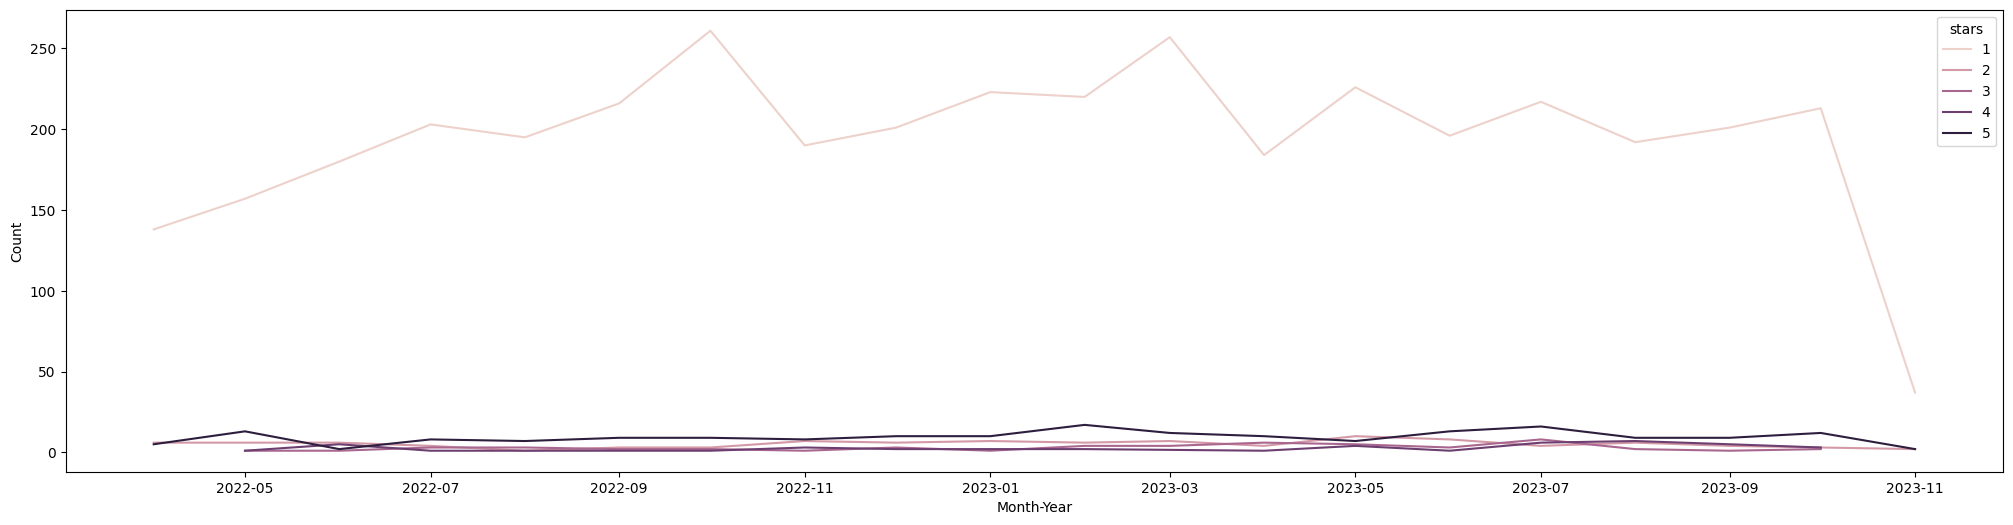

In [56]:
# df['Month-Year'] = df['review_datetime'].dt.strftime('%y-%m')
reviews_over_time = df.groupby(['Month-Year', 'stars']).size().reset_index(name='Count')
plt.figure(figsize=(25, 6))
sns.lineplot(data= reviews_over_time, x="Month-Year", y="Count", hue="stars")

## Ratings Across Time

In [57]:
def plot_barplots(df1, x, y, title=None, xlabel=None, ylabel=None):
    plt.figure(figsize=(25, 10))
    # sns.barplot(data= ratings_over_time, x="Month-Year", y="stars")

    ax = sns.barplot(data=df1, x=x, y=y)

    # Add labels within the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

    # Add labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()


In [58]:
ratings_over_time = df.groupby('Month-Year').agg({'stars': 'mean'}).reset_index()
ratings_over_time['stars'] = ratings_over_time['stars'].round(1)

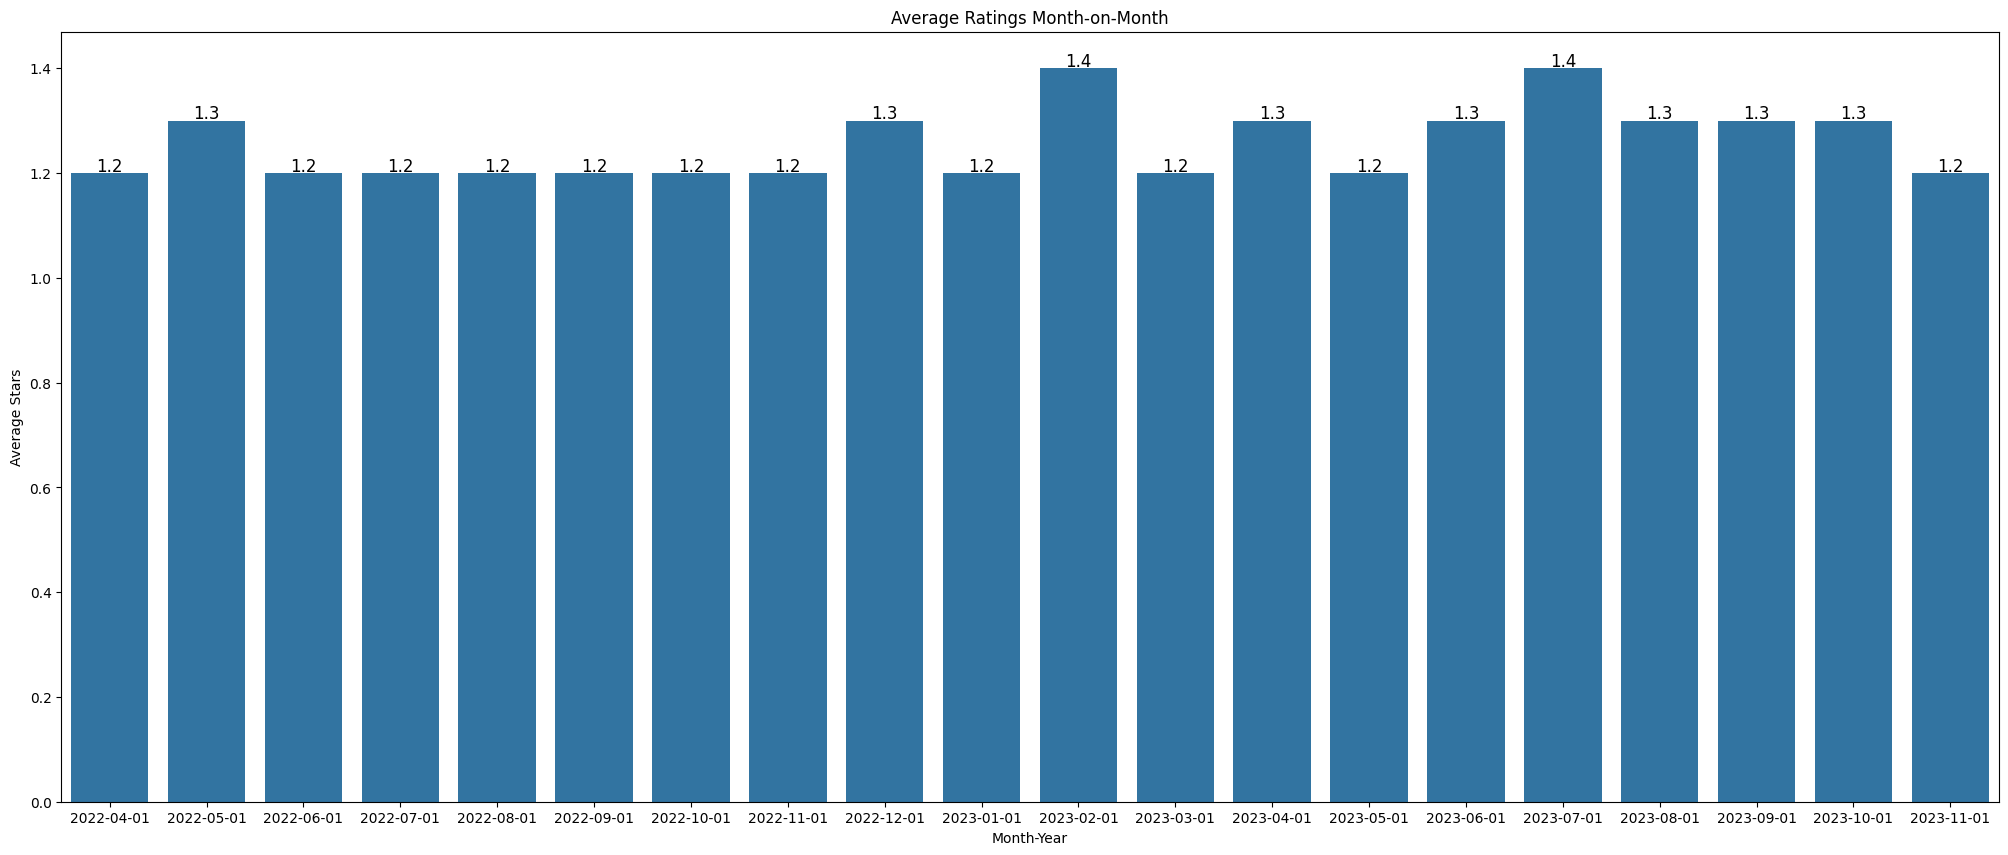

In [59]:
plot_barplots(df1=ratings_over_time, x="Month-Year", y="stars", 
              title="Average Ratings Month-on-Month", xlabel="Month-Year", 
              ylabel="Average Stars")

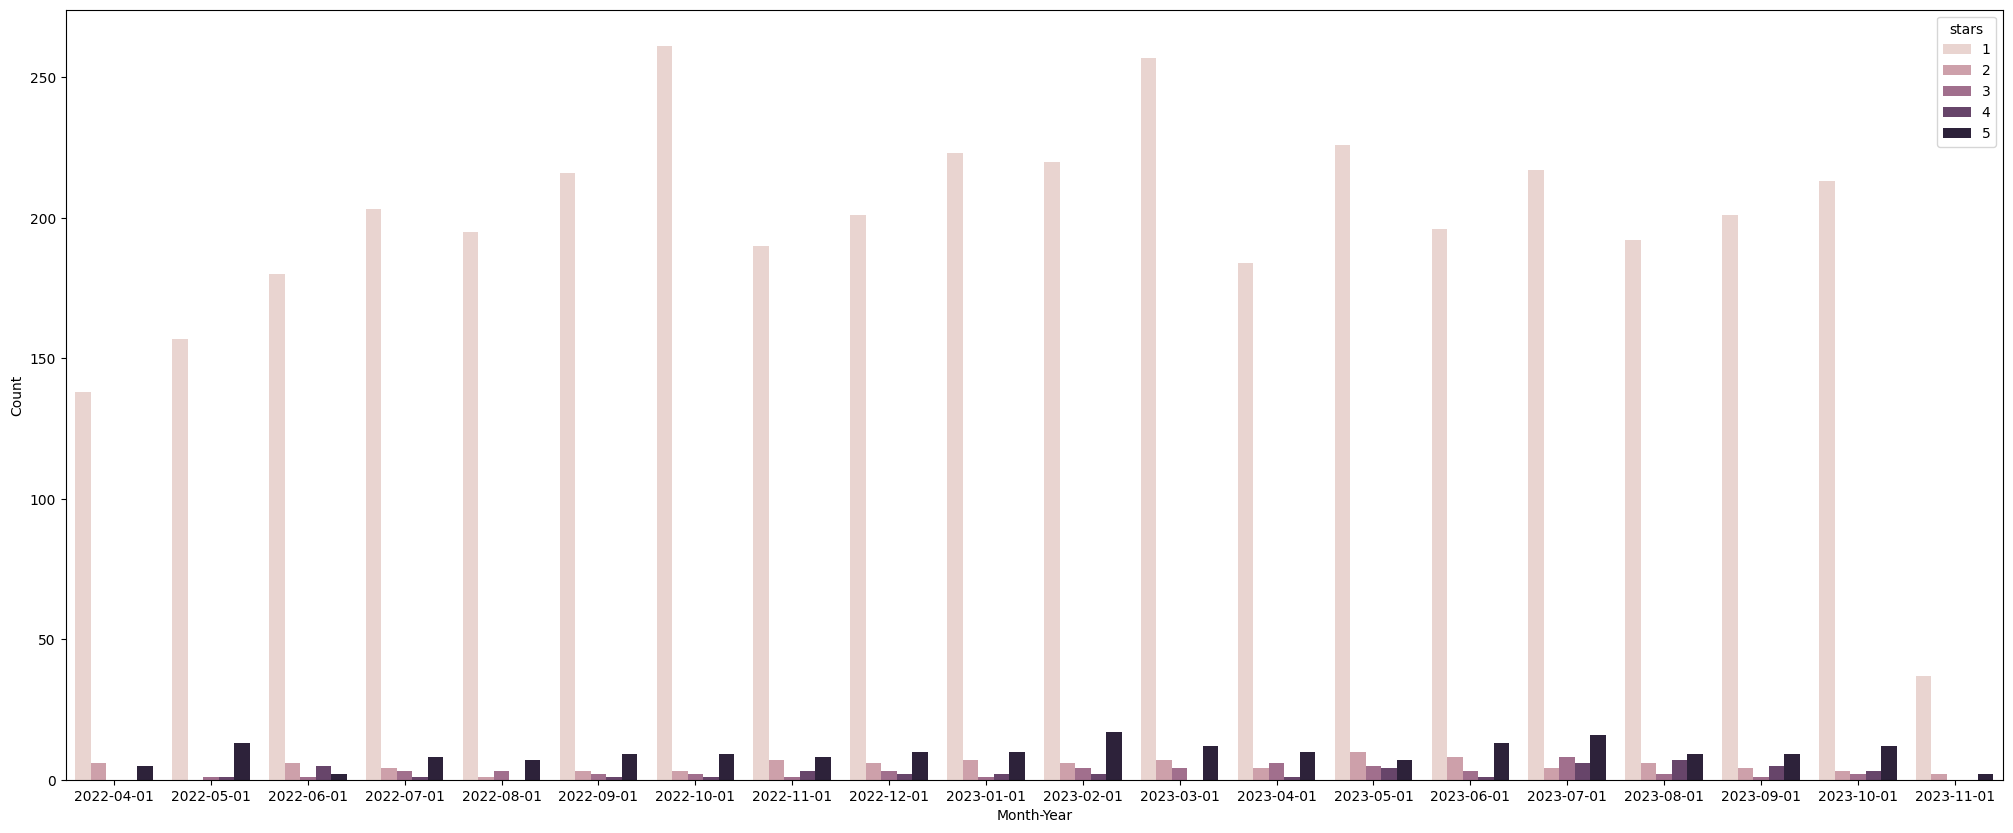

In [60]:
ratings_overtime_2 = df.groupby(['Month-Year', 'stars']).size().reset_index(name='Count')
plt.figure(figsize=(25, 10))
sns.barplot(data=ratings_overtime_2, x="Month-Year", y="Count", hue="stars");

In [61]:
ratings_overtime_2 = df.groupby(['Month-Year', 'stars']).size().reset_index(name='Count')

# Pivot the table to make it easier to calculate percentages
pivoted = ratings_overtime_2.pivot(index='Month-Year', columns='stars', values='Count')

# Calculate the percentages
pivoted['1-Star %'] = ((pivoted[1] / pivoted.sum(axis=1)) * 100).round(1)
pivoted['5-Star %'] = ((pivoted[5] / pivoted.sum(axis=1)) * 100).round(1)
pivoted["Cumulative 1 and 5"] = pivoted['1-Star %'] + pivoted['5-Star %']

# Reset the index
pivoted.reset_index(inplace=True)

In [62]:
pivoted

stars,Month-Year,1,2,3,4,5,1-Star %,5-Star %,Cumulative 1 and 5
0,2022-04-01,138.0,6.0,NaN,NaN,5.0,92.6,2.1,94.7
1,2022-05-01,157.0,NaN,1.0,1.0,13.0,91.3,4.9,96.2
2,2022-06-01,180.0,6.0,1.0,5.0,2.0,92.8,0.7,93.5
3,2022-07-01,203.0,4.0,3.0,1.0,8.0,92.7,2.6,95.3
4,2022-08-01,195.0,1.0,3.0,NaN,7.0,94.7,2.3,97.0
5,2022-09-01,216.0,3.0,2.0,1.0,9.0,93.5,2.8,96.3
6,2022-10-01,261.0,3.0,2.0,1.0,9.0,94.6,2.4,97.0
7,2022-11-01,190.0,7.0,1.0,3.0,8.0,90.9,2.7,93.6
8,2022-12-01,201.0,6.0,3.0,2.0,10.0,90.5,3.2,93.7
9,2023-01-01,223.0,7.0,1.0,2.0,10.0,91.8,3.0,94.8


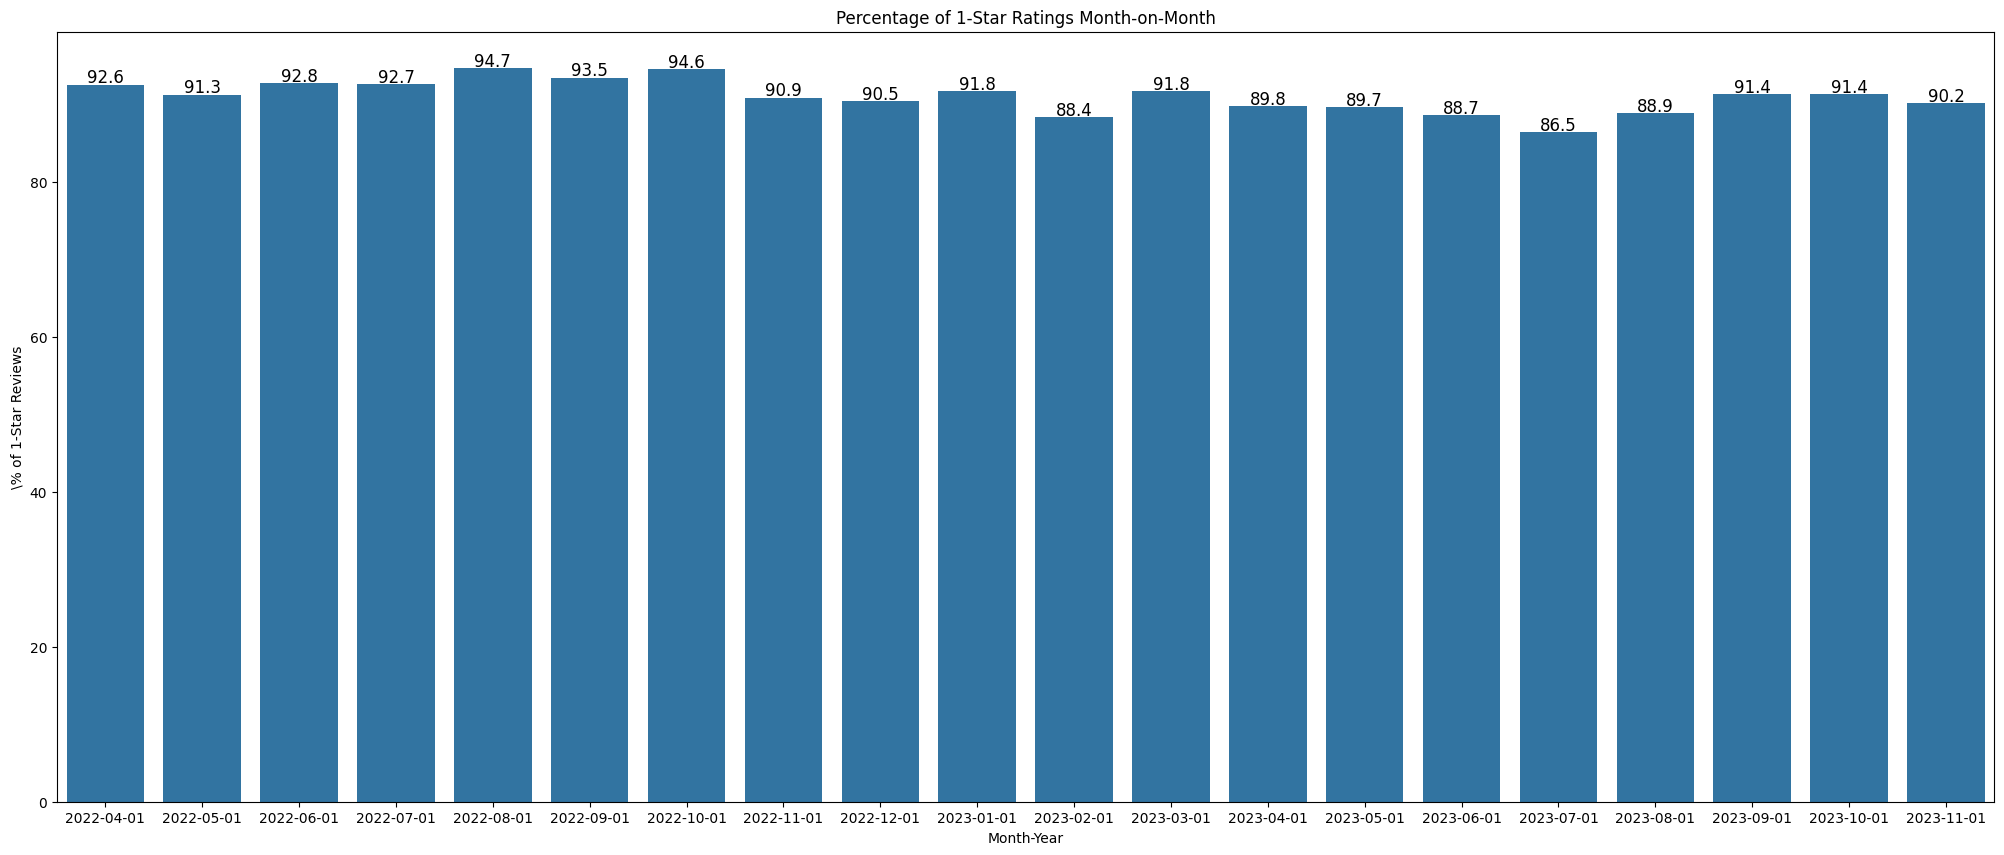

In [63]:
plot_barplots(df1=pivoted, x="Month-Year", y="1-Star %", 
              title="Percentage of 1-Star Ratings Month-on-Month", xlabel="Month-Year", 
              ylabel="\% of 1-Star Reviews")

## Let's investigate the peculiar performance of 2012

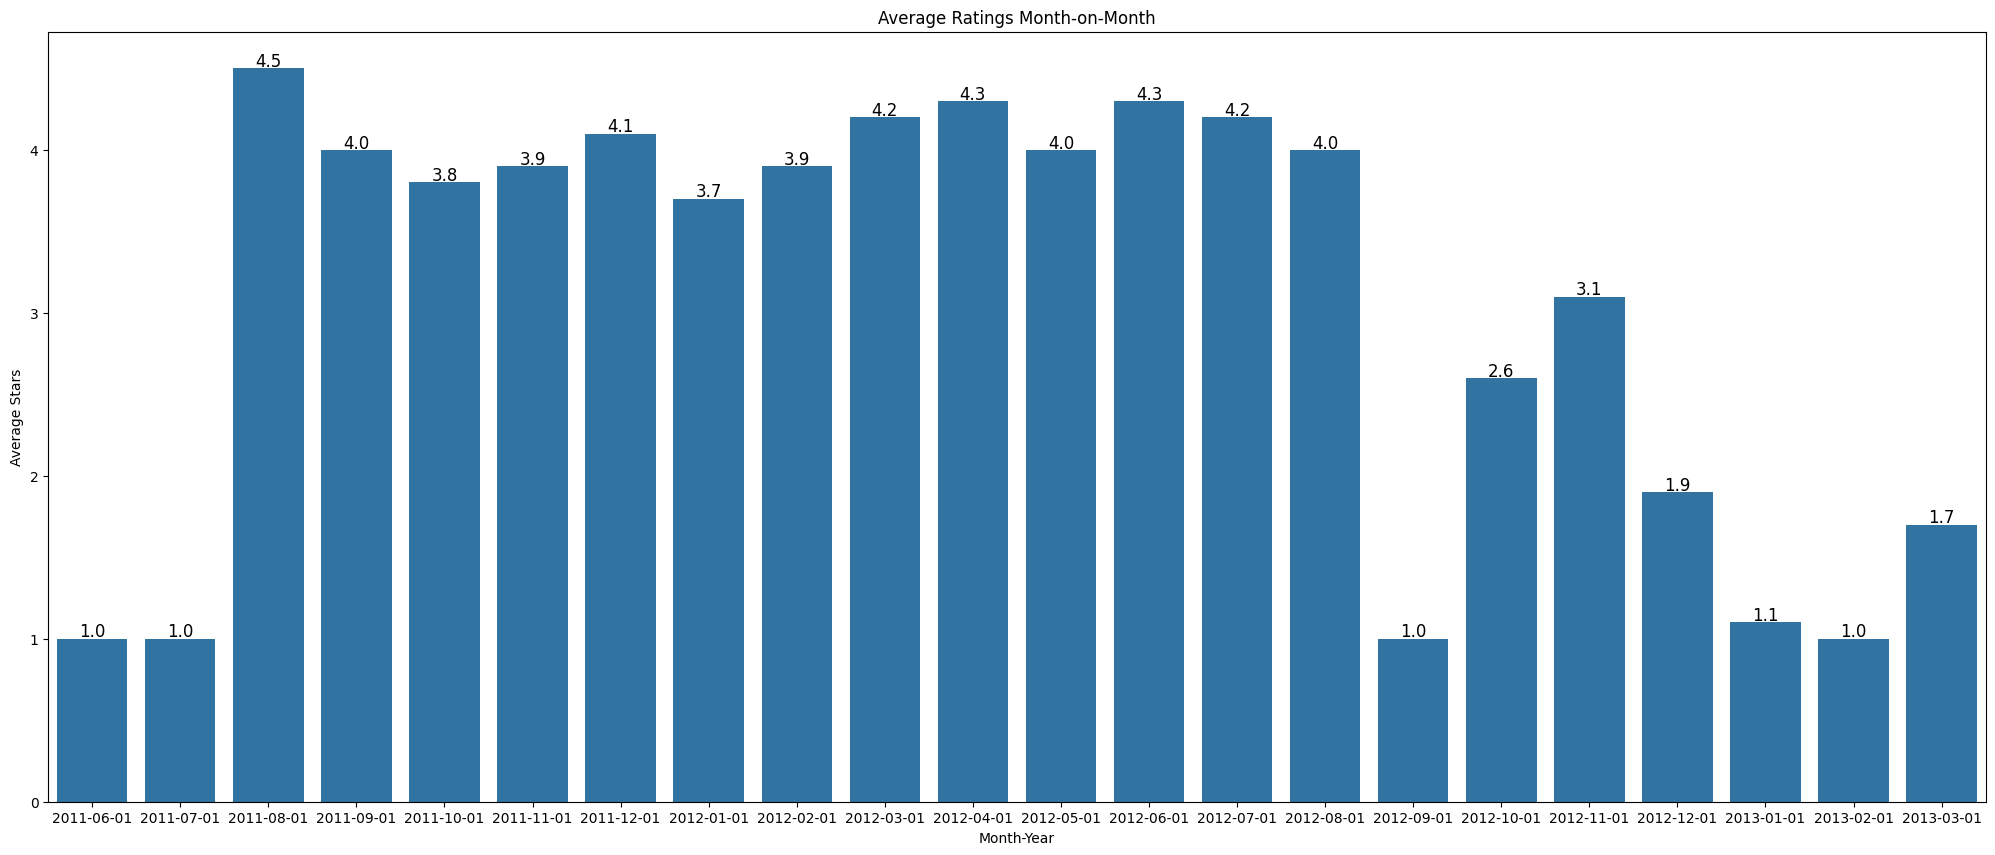

In [71]:
df_2012 = df_full[(df_full["review_datetime"]>="2011-06-01") & (df_full["review_datetime"]<="2013-03-31")]
ratings_over_time_2012 = df_2012.groupby('Month-Year').agg({'stars': 'mean'}).reset_index()
ratings_over_time_2012['stars'] = ratings_over_time_2012['stars'].round(1)

plot_barplots(df1=ratings_over_time_2012, x="Month-Year", y="stars", 
              title="Average Ratings Month-on-Month", xlabel="Month-Year", 
              ylabel="Average Stars")

# Conclusion: Based on data, PayPal had a good run between August of 2011 and August of 2012.

## Company Reply Rate

Reply rate is the number of reviews replied by the company over the total review at a given period.

Based on the plot below, PayPal has never replied to reviews.

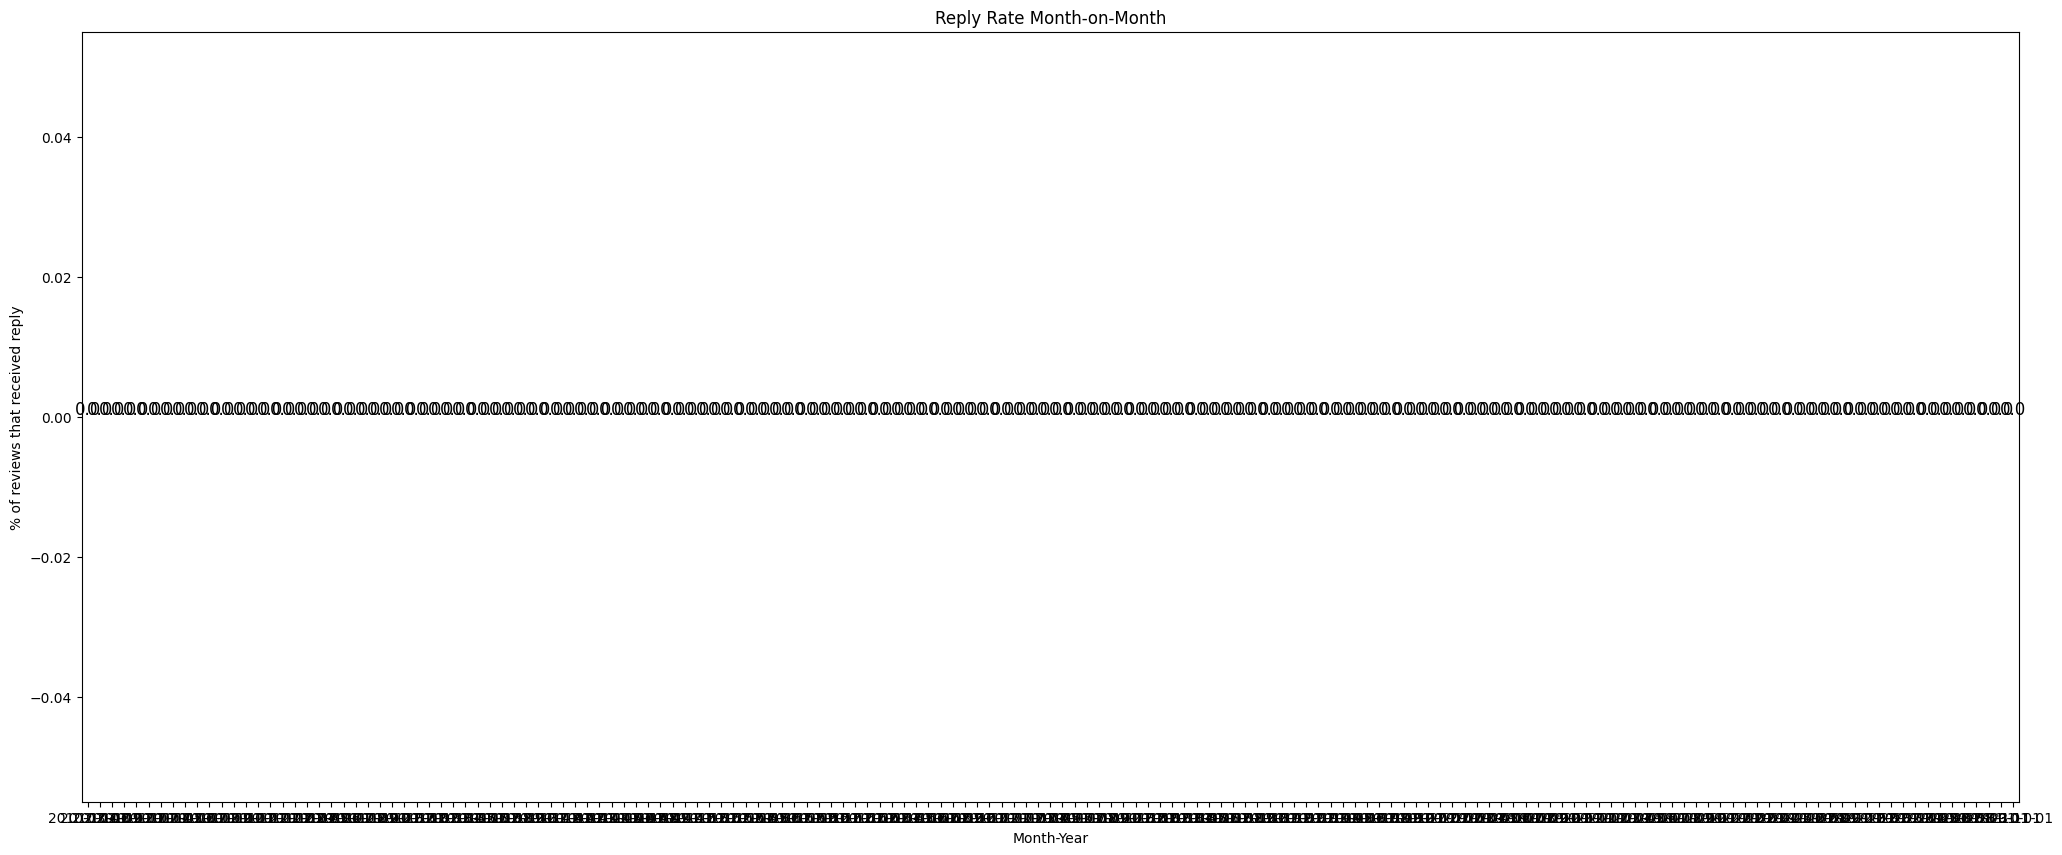

In [72]:
reply_rate = df_full.groupby('Month-Year')['CompanyReply'].apply(lambda x: (1-(x.isna().sum() / len(x))) * 100).reset_index(name='Reply Rate')

plot_barplots(df1=reply_rate, x="Month-Year", y="Reply Rate", 
              title="Reply Rate Month-on-Month", xlabel="Month-Year", 
              ylabel="% of reviews that received reply")